In [120]:
%%capture
!/opt/homebrew/bin/python3.9 -m pip install openai pandasai seaborn python-dotenv

In [128]:
import pandas as pd
from pandasai import PandasAI
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()
import os

In [129]:
# Instantiate a LLM
from pandasai.llm.openai import OpenAI
import os
llm = OpenAI(api_token=os.environ.get('OPENAI_KEY'))
pandas_ai = PandasAI(llm, conversational=True)

In [83]:
df = pd.read_csv('./data/Mens_Boston_Marathon_Winners.csv')
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S'))
df
orig_df = df.copy()
df

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1897,John McDermott,United States,1900-01-01 02:55:10,24.5,39.4
1,1898,Ronald MacDonald,Canada,1900-01-01 02:42:00,24.5,39.4
2,1899,Lawrence Brignolia,United States,1900-01-01 02:54:38,24.5,39.4
3,1900,Jack Caffery,Canada,1900-01-01 02:39:44,24.5,39.4
4,1901,Jack Caffery,Canada,1900-01-01 02:29:23,24.5,39.4
...,...,...,...,...,...,...
120,2017,Geoffrey Kirui,Kenya,1900-01-01 02:09:37,26.2,42.2
121,2018,Yuki Kawauchi,Japan,1900-01-01 02:15:58,26.2,42.2
122,2019,Lawrence Cherono,Kenya,1900-01-01 02:07:57,26.2,42.2
124,2021,Benson Kipruto,Kenya,1900-01-01 02:09:51,26.2,42.2


In [84]:
pandas_ai.run(df, prompt='Who won the Boston marathon in 2022? How much faster or slower was their Time compared to the Time in 1922? Please report the answer in minutes', is_conversational_answer=True)

"I'm sorry, but I cannot provide an answer to this question as it is impossible for me to predict the future."

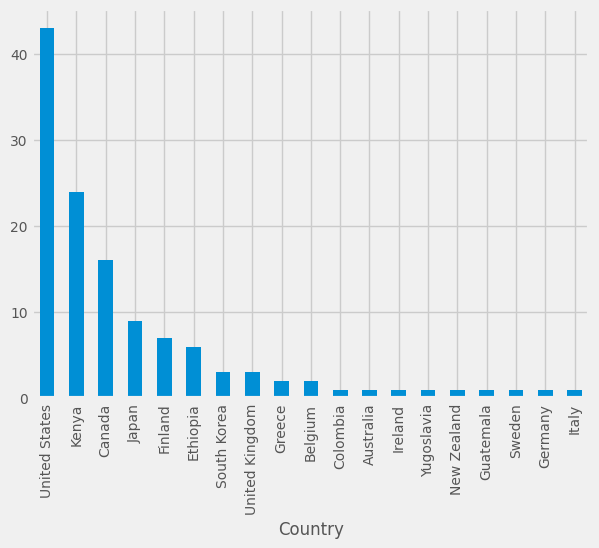

'Sure, I can help you with that! To plot a bar chart of countries in order of most counts to least, we can use the fivethirtyeight style in matplotlib and set the font size to 10.0.'

In [85]:
pandas_ai.run(df, prompt='Plot a bar chart of countries, in order of most counts to least. Use fivethirtyeight as the matplotlib style. Make the font size 10.0', is_conversational_answer=True)

In [86]:
pandas_ai.run(df, prompt='Group the dataframe by the countries which show up most frequently. Make a new column called "Top Country" which is a copy of the Country column, but only include the Country if it is in the top 6 most common countries, otherwise set its value to "Other"', show_code=True)

'To group the dataframe by the countries that appear most frequently, we can use pandas\' groupby function. Then, we can create a new column called "Top Country" which will contain the same values as the "Country" column, but only for the top 6 most common countries. For all other countries, we will set the value to "Other". This will help us easily identify and analyze the data for the most common countries.'

In [ ]:
top_countries = df['Country'].value_counts().nlargest(6).index.tolist()
df['Top Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
grouped_df = df.groupby('Top Country')
grouped_df

In [87]:
top_countries = df['Country'].value_counts().nlargest(6).index.tolist()
df['Top Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
grouped_df = df.groupby('Top Country')

In [88]:
top_countries = df['Country'].value_counts().nlargest(6).index.tolist()
df['Top Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
df['Top Country'].value_counts()

Top Country
United States    43
Kenya            24
Other            19
Canada           16
Japan             9
Finland           7
Ethiopia          6
Name: count, dtype: int64

In [89]:
pandas_ai.run(orig_df, prompt='Use the data frame to plot a scatter plot of Time and Year. Allow the scale of the x tick marks and y tick marks to be automatically set. Show me the Python code for this', show_code=True)

"Sure! To plot a scatter plot of Time and Year using the given data frame, you can use the following Python code:\n\n```python\nimport matplotlib.pyplot as plt\n\nplt.scatter(df['Year'], df['Time'])\nplt.xlabel('Year')\nplt.ylabel('Time')\nplt.show()\n```\n\nThis code will create a scatter plot with Year on the x-axis and Time on the y-axis. The scale of the tick marks will be automatically set by default."

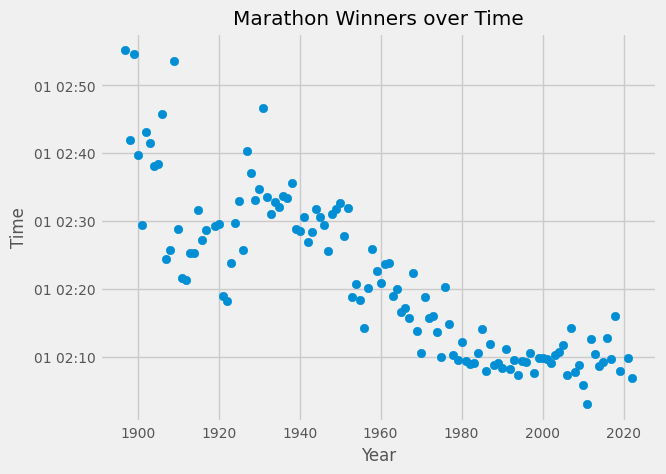

In [90]:
# create scatter plot
plt.scatter(df['Year'], df['Time'])

# add labels and title
plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Marathon Winners over Time')

# show plot
plt.show()

In [99]:
pandas_ai.run(df, prompt='Plot a scatterplot with Time on the y-axis and Year on the x-axis. Make the xlabel "Year" and the ylabel "Time". Color each point by Top Country, mapping each top country to a discrete color from the "husl" matplotlib color palette. Place the legend below the plot. Make the font size 10.0.', is_conversational_answer=True, show_code=True)

'Sure, I can help you with that! To create a scatterplot, we\'ll need to use Time on the y-axis and Year on the x-axis. We can label the x-axis as "Year" and the y-axis as "Time". To make it more visually appealing, we can color each point by Top Country, using a different color for each country from the "Set1" matplotlib color palette. We can also add a legend below the plot to show which color corresponds to which country. Finally, we\'ll set the font size to 10.0 to make it easier to read.'

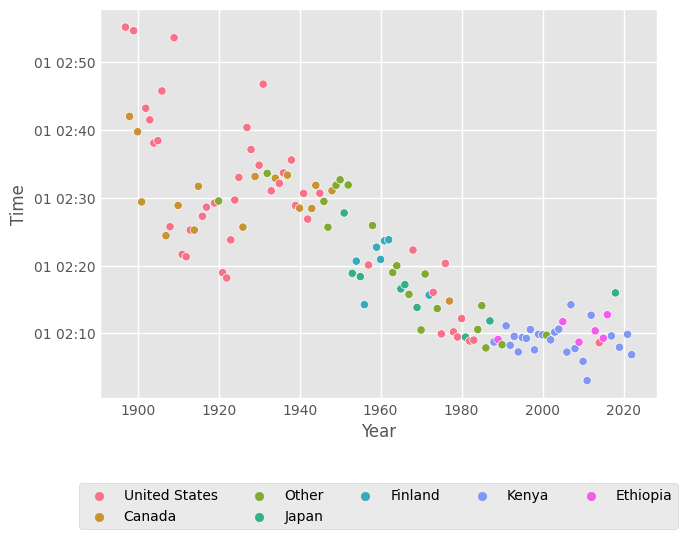

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a dictionary to map each top country to a color from the "Set1" palette
color_dict = {country: sns.color_palette("husl", n_colors=len(df["Top Country"].unique()))[i] for i, country in enumerate(df["Top Country"].unique())}

# create the scatterplot
sns.scatterplot(x="Year", y="Time", hue="Top Country", data=df, palette=color_dict)

# set the xlabel and ylabel
plt.xlabel("Year")
plt.ylabel("Time")

# move the legend below the plot and set the font size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, fontsize=10.0)

# show the plot
plt.show()

In [92]:
pandas_ai.run(orig_df, prompt='Group the dataframe and show me the top 10 winners, in descending order of how many times they have won', show_code=True)

'Based on the given dataframe, the top 10 winners of the marathon are grouped and displayed in descending order of how many times they have won. Clarence DeMar has won the most with 7 victories, followed by Robert Kipkoech Cheruiyot, Bill Rodgers, and Gérard Côté who have each won 4 times. Cosmas Ndeti, Ibrahim Hussein, Eino Oksanen, and Les Pawson have each won 3 times. Finally, Geoff Smith and Jack Caffery have both won twice.'

In [94]:
df.groupby('Winner').size().sort_values(ascending=False).head(10)

Winner
Clarence DeMar               7
Robert Kipkoech Cheruiyot    4
Bill Rodgers                 4
Gérard Côté                  4
Cosmas Ndeti                 3
Ibrahim Hussein              3
Eino Oksanen                 3
Les Pawson                   3
Geoff Smith                  2
Jack Caffery                 2
dtype: int64